# Hill Climbing for the Travelling Sales Agent Problem

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//ericmanley/ai_map_environments/blob/tsp/notebooks/tsp_hill_climb_lab.ipynb)

This notebook shows how to use the `TravellingSalesAgentProblem` class, which will allow you to try out solutions to the Travelling Salesperson Problem: https://en.wikipedia.org/wiki/Travelling_salesman_problem

If you are running on Colab or don't have the `mapbots` module installed, you need to run this:

In [ ]:
import sys

!{sys.executable} -m pip install --upgrade git+https://github.com/ericmanley/ai_map_environments.git@tsp

## Creating a map

You can create an instance of the travelling sales agent problem similar to how you created `StreetSweeperWorld` instances. It allows you to select a map of a real place. It will randomly generate an origin (shown in purple) and some number of destinations specified by `num_locations`. You can seed the random generator to try experiments on the same instance.

preparing map - this may take some time
calculating travel times - this may take some time


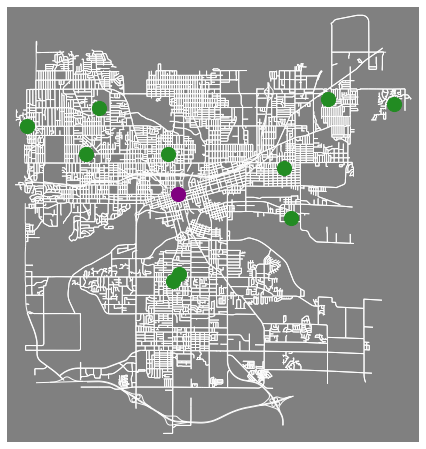

In [2]:
from mapbots import TravellingSalesAgentProblem

tsp_instance = TravellingSalesAgentProblem(place="Des Moines, Iowa, USA", num_locations=10, random_seed=4)
tsp_instance.display_map()

## Listing the destinations

The `get_destination_locations()` method will give you a list of the location ids for all of the destination locations.

In [3]:
destinations = tsp_instance.get_destination_locations()
destinations

[160870668,
 160813625,
 2359785044,
 160895351,
 160918148,
 160826598,
 160805761,
 160800024,
 160742630,
 160897602]

## Trying a TSP solution

A solution to TSP is a list of destination location ids - so the destinations list we got above is a valid one to try. You can display it on the map by passing the list to the optional `route` parameter when displaying the map.

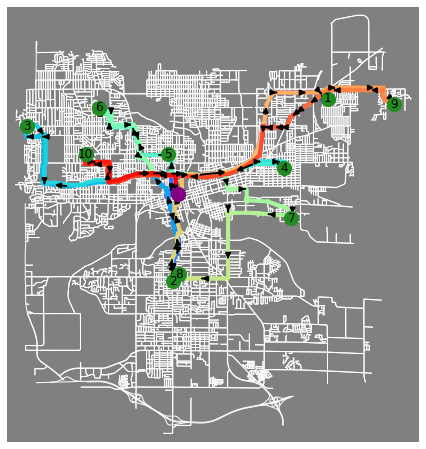

In [4]:
tsp_instance.display_map(route = destinations)

You can also calculate the total travel time with `route_travel_time()` like this:

In [5]:
route1_cost = tsp_instance.route_travel_time(route = destinations )
print(route1_cost)

7246.2


## Generating a Successor Solution

Here's how you could write a function that swaps the order of two of the destinations - specified by indexes `i` and `j`.

In [6]:
def generate_successor(dest_list,i,j):
    dest_list_copy = dest_list[:] # make a copy so that we don't destroy the original list
    # three-step swap
    temp = dest_list_copy[i] # copy item i to a temp variable
    dest_list_copy[i] = dest_list_copy[j] # overwrite item i with item j
    dest_list_copy[j] = temp # set item j to be what was preiously in item i
    return dest_list_copy

Now we can try out a successor and see if it improves the overall travel time:

Here's the new route order: [160870668, 160813625, 160800024, 160895351, 160918148, 160826598, 160805761, 2359785044, 160742630, 160897602]
Here is its travel time: 6812.5999999999985


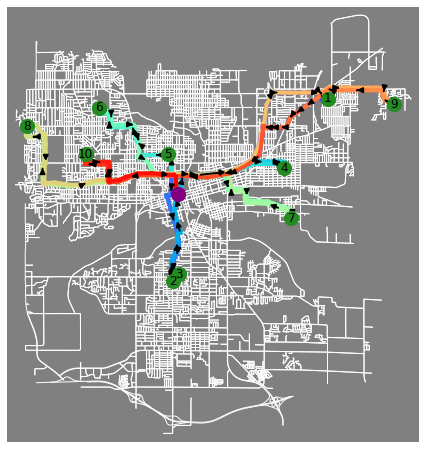

In [7]:
successor_route = generate_successor(destinations,2,7) # you can use any two indices
print("Here's the new route order:",successor_route)

print("Here is its travel time:", tsp_instance.route_travel_time(route = successor_route) )

tsp_instance.display_map(route = successor_route ) 

## Finding the successor with lowest travel time

What if we wanted to consider all possible successors to see which one has the lowest overall travel time? We could write a function for that.

In [8]:
def best_successor(tsp_instance,current_state):
    
    # keeps track of the state and score of the best successor state
    best_successor = None
    best_successor_score = float("inf") #infinity
    
    num_dests = len(current_state)
    
    # loop through all possible pairs of destinations
    for i in range(num_dests):
        for j in range(num_dests):
            if i != j: #skip swapping a location with itself
                # generate the next successor
                next_successor = generate_successor(current_state,i,j)
                # calculate its score
                next_successor_score = tsp_instance.route_travel_time(route = next_successor)
                # if is the best so far, keep track of it
                if next_successor_score < best_successor_score:
                    best_successor = next_successor
                    best_successor_score = next_successor_score
                    
    return best_successor
            

Successor state with lowest travel time: [160800024, 160813625, 2359785044, 160895351, 160918148, 160826598, 160805761, 160870668, 160742630, 160897602]
Travel time: 5485.5999999999985


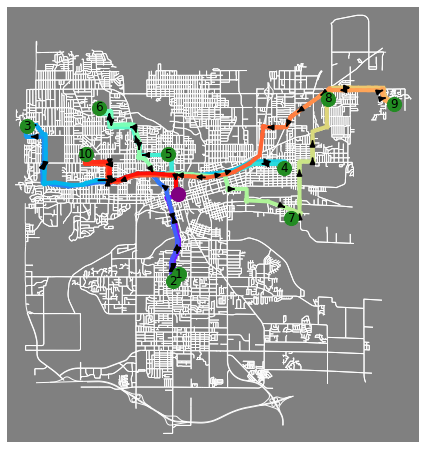

In [9]:
new_state = best_successor(tsp_instance,destinations)
print("Successor state with lowest travel time:",new_state)
print("Travel time:",tsp_instance.route_travel_time(route = new_state))
tsp_instance.display_map(route = new_state )

## Exercise: Implementing the Hill Climbing Algorithm

We are now ready to implement the full hill-climbing algorithm. Start with our pseudocode (for the minimization version) as comments:

In [10]:
# function Hill-Climbing(problem) returns a state that is a local minimum
#
# local variables: current, a problem state
#                  neighbor, a problem state
#
# current ← initial problem state
# loop do
#      neighbor ← a lowest-valued successor state of current
#      if Value[neighbor] >= Value[current] 
#           then return State[current] 
#      current ← neighbor
# end

## Assignment 

For this assignment, you will implement an iterative improvement algorithm which attempts to avoid getting stuck in local minima like the hill-climbing algorithm does. This can be something like

* Add an improvement to hill-climbing like random restarts or random movement to get out of local minima
* Local beam search
* Simulated Annealing
* Genetic Algorithm



## What to turn in

Create a new notebook with both your hill-climbing code as well as what you completed for the assignment. Run both on a few maps to show that you bet the basic hill-climbing approach on average. Display some maps showing the difference.

Also, include a text/markdown cell in which you 

1. say what algorithmidea you implemented - if it is something non-standard, make sure to explain how it works
2. say what your successor states are - how are they generated from the current state?
3. give a short description of the results that you found

Share the notebook in the same way you did for Projects 1 and 2.

## Grading

The assignment will be worth 8 points.

* You can get up to 1 point if you turn in this starter notebook and you ran all the code yourself. Create a text/markdown cell at the top where you explain that's what you did.
* You can get up to 4 points if you implement a basic hill-climbing algorithm
* You can get up to 8 points if you implement an algorithm which attempts to avoid local minima and show it is successful through testing. 

If you have only a partial solution or are missing any of the text/markdown requirements, you can get somewhere between 5 and 7 points based on how far along you are.